In [1]:
%cd ../..
%load_ext autoreload
%autoreload 2

/home/jupyter/map-ephys


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pynwb import NWBFile, TimeSeries, NWBHDF5IO
from pipeline.export import nwb_foraging

[2022-11-10 23:36:28,785][INFO]: Connecting map-superuser@datajoint.mesoscale-activity-map.org:3306
[2022-11-10 23:36:28,854][INFO]: Connected map-superuser@datajoint.mesoscale-activity-map.org:3306


# Export a specific session to nwb format (not saved fo a .nwb file)

This is a good example session

In [3]:
session_key = {'subject_id': 482353, 'session': 45}

Export the whole session to the NWB format

In [4]:
nwb = nwb_foraging.datajoint_to_nwb(session_key)

In [77]:
nwb

root pynwb.file.NWBFile at 0x140095916909712
Fields:
  acquisition: {
    BehavioralEvents <class 'pynwb.behavior.BehavioralEvents'>
  }
  devices: {
    18005108622 (neuropixels 1.0 - 3B) <class 'pynwb.device.Device'>,
    18005123491 (neuropixels 1.0 - 3B) <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    18005108622 1-384 <class 'pynwb.ecephys.ElectrodeGroup'>,
    18005123491 1-384 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: moving lickports, delay period, early lick punishment, sound GO cue then free choice
  experimenter: ['HH']
  file_create_date: [datetime.datetime(2022, 11, 7, 23, 10, 6, 985953, tzinfo=tzlocal())]
  identifier: HH13_20211117_110858_s45
  institution: Janelia Research Campus / Allen Institute
  related_publications: ['']
  session_description: PERFECT
  session_start_time: 2021-11-17 11:08:58+00:00
  subject: subject pynwb.file.Subject at 0x140095241622480
Field

### Retrieve trial info

Including `choice`, `outcome`, and some latent variables from model fitting (`left_action_value`, `right_action_value`, `rpe`).

In [75]:
df_trials = nwb.trials.to_dataframe()
df_trials

,start_time,stop_time,trial,trial_uid,task,task_protocol,trial_instruction,early_lick,outcome,auto_water,free_water,choice,left_reward_prob,right_reward_prob,left_action_value,right_action_value,rpe
id,,,,,,,,,,,,,,,,,
0,-0.5381,9.5510,1,30881,foraging,100,none,no early,hit,0,0,left,0.338,0.113,0.510122,0.000000,1.000000
1,9.5510,16.5274,2,30882,foraging,100,none,no early,miss,0,0,left,0.338,0.113,0.282956,0.000000,-0.510122
2,16.5274,27.1126,3,30883,foraging,100,none,early,hit,0,0,left,0.338,0.113,0.648736,0.000000,0.717044
3,27.1126,39.9647,4,30884,foraging,100,none,early,hit,0,0,left,0.338,0.113,0.827923,0.000000,0.351264
4,39.9647,45.9172,5,30885,foraging,100,none,no early,miss,0,0,left,0.338,0.113,0.459234,0.000000,-0.827923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,6470.6752,6485.7258,678,31558,foraging,100,none,early,miss,0,0,left,0.113,0.338,0.000231,0.025060,-0.000417
678,6485.7258,6496.2766,679,31559,foraging,100,none,no early,ignore,0,0,null,0.113,0.338,NaN,NaN,NaN
679,6496.2766,6508.5194,680,31560,foraging,100,none,early,miss,0,0,left,0.113,0.338,0.000128,0.005225,-0.000231


Plot the behavior.

(<Figure size 1600x600 with 1 Axes>, <AxesSubplot:>)

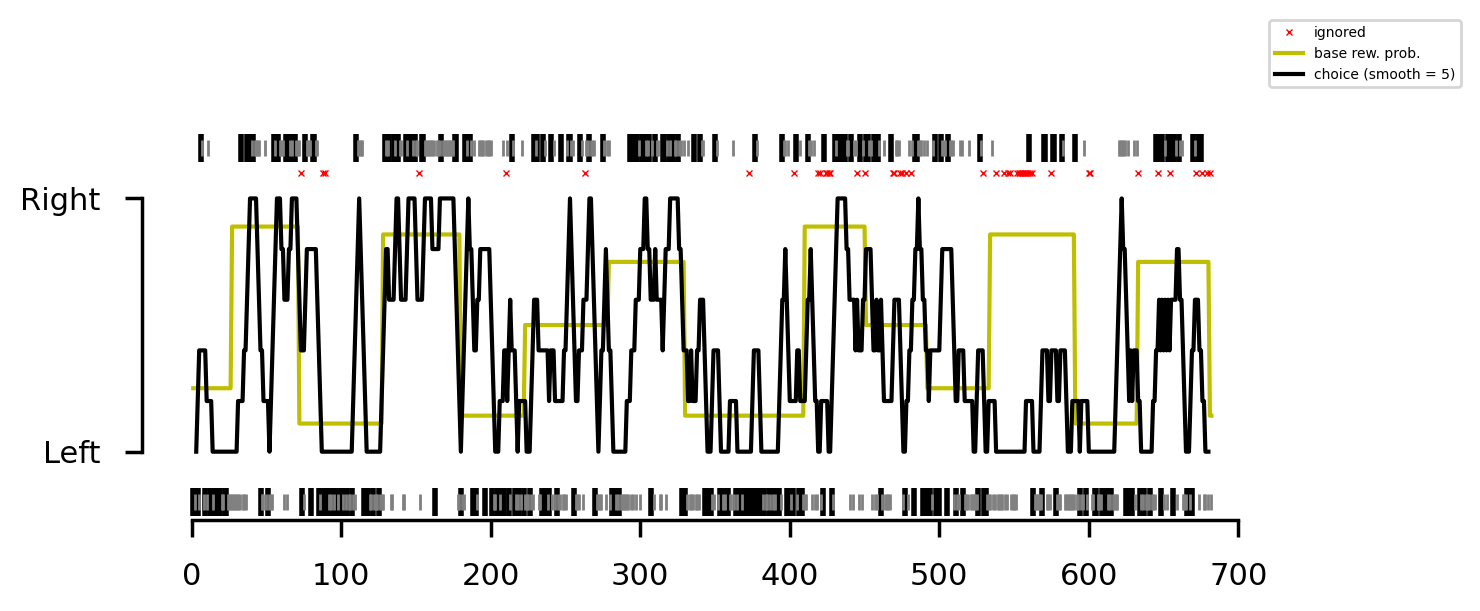

In [73]:
from pipeline.plot import foraging_model_plot

# Reformat data
_choice_history = df_trials.choice.values
choice_history = np.array([{'left': 0, 'right': 1, 'null': np.nan}[c] for c in _choice_history])

_reward = df_trials.outcome
reward_history = np.zeros([2, len(_reward)])  # .shape = (2, N trials)
for c in (0, 1):
    reward_history[c, choice_history==c] = (_reward[choice_history==c] == 'hit').astype(int)
    
p_reward = np.vstack([df_trials.left_reward_prob, df_trials.right_reward_prob])

# Plot session
foraging_model_plot.plot_session_lightweight([np.array([choice_history]), reward_history, p_reward])

### Retrieve event times

In [36]:
nwb.acquisition

{'BehavioralEvents': BehavioralEvents pynwb.behavior.BehavioralEvents at 0x139725633278224
 Fields:
   time_series: {
     bitcodestart <class 'pynwb.base.TimeSeries'>,
     bpodstart <class 'pynwb.base.TimeSeries'>,
     choice <class 'pynwb.base.TimeSeries'>,
     go <class 'pynwb.base.TimeSeries'>,
     left_lick <class 'pynwb.base.TimeSeries'>,
     reward <class 'pynwb.base.TimeSeries'>,
     right_lick <class 'pynwb.base.TimeSeries'>,
     trialend <class 'pynwb.base.TimeSeries'>,
     zaberready <class 'pynwb.base.TimeSeries'>,
     zaberstep <class 'pynwb.base.TimeSeries'>
   }}

All time stamps are relative to the first trial start of this session (in seconds). <br>
For exqmple, time stamps of `go` cue

In [57]:
nwb.acquisition['BehavioralEvents']['go'].timestamps[:10]

array([ 0.53142, 12.39063, 19.66991, 32.94569, 41.91493, 46.91979,
       53.32723, 64.47675, 72.82484, 79.6646 ])

Time stamps of all left licks

In [58]:
nwb.acquisition['BehavioralEvents']['left_lick'].timestamps[:10]

array([0.7173 , 0.86981, 0.98371, 1.131  , 1.25177, 1.38798, 1.5208 ,
       1.66485, 1.78918, 1.92897])

## Retrieve ephys

In this example session, two probes were inserted at the same time

In [79]:
nwb.devices

{'18005123491 (neuropixels 1.0 - 3B)': 18005123491 (neuropixels 1.0 - 3B) pynwb.device.Device at 0x140094564194448,
 '18005108622 (neuropixels 1.0 - 3B)': 18005108622 (neuropixels 1.0 - 3B) pynwb.device.Device at 0x140095911757072}

`nwb.electrodes` stores information of all electrodes (recording sites) on all probes in this session

In [80]:
nwb.electrodes.to_dataframe()

,x,y,z,imp,location,filtering,group,group_name,shank,shank_col,shank_row,electrode_id,ccf_annotation,rel_x,rel_y,rel_z
id,,,,,,,,,,,,,,,,
0,5240.0,7120.0,6778.0,-1.0,"{""brain_regions"": ""right Striatum""}",,18005123491 1-384 pynwb.ecephys.ElectrodeGroup...,18005123491 1-384,1,1,1,1,root,16.0,0.0,NaN
1,5240.0,7120.0,6778.0,-1.0,"{""brain_regions"": ""right Striatum""}",,18005123491 1-384 pynwb.ecephys.ElectrodeGroup...,18005123491 1-384,1,2,1,2,root,48.0,0.0,NaN
2,5240.0,7100.0,6778.0,-1.0,"{""brain_regions"": ""right Striatum""}",,18005123491 1-384 pynwb.ecephys.ElectrodeGroup...,18005123491 1-384,1,1,2,3,root,0.0,20.0,NaN
3,5240.0,7100.0,6778.0,-1.0,"{""brain_regions"": ""right Striatum""}",,18005123491 1-384 pynwb.ecephys.ElectrodeGroup...,18005123491 1-384,1,2,2,4,root,32.0,20.0,NaN
4,5240.0,7080.0,6778.0,-1.0,"{""brain_regions"": ""right Striatum""}",,18005123491 1-384 pynwb.ecephys.ElectrodeGroup...,18005123491 1-384,1,1,3,5,root,16.0,40.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,5100.0,3520.0,3298.0,-1.0,"{""brain_regions"": ""left Striatum""}",,18005108622 1-384 pynwb.ecephys.ElectrodeGroup...,18005108622 1-384,1,2,190,380,Caudoputamen,32.0,3780.0,NaN
764,5100.0,3500.0,3298.0,-1.0,"{""brain_regions"": ""left Striatum""}",,18005108622 1-384 pynwb.ecephys.ElectrodeGroup...,18005108622 1-384,1,1,191,381,Caudoputamen,16.0,3800.0,NaN
765,5100.0,3500.0,3298.0,-1.0,"{""brain_regions"": ""left Striatum""}",,18005108622 1-384 pynwb.ecephys.ElectrodeGroup...,18005108622 1-384,1,2,191,382,Caudoputamen,48.0,3800.0,NaN


`nwb.units` stores all units 

In [81]:
nwb.units

units pynwb.misc.Units at 0x140094568031056
Fields:
  colnames: ['insertion_number' 'sampling_rate' 'unit_quality' 'unit_posx' 'unit_posy'
 'unit_amp' 'unit_snr' 'isi_violation' 'avg_firing_rate' 'drift_metric'
 'presence_ratio' 'amplitude_cutoff' 'isolation_distance' 'l_ratio'
 'd_prime' 'nn_hit_rate' 'nn_miss_rate' 'silhouette_score' 'max_drift'
 'cumulative_drift' 'duration' 'halfwidth' 'pt_ratio'
 'repolarization_slope' 'recovery_slope' 'spread' 'velocity_above'
 'velocity_below' 'unit_id' 'spike_times' 'electrodes' 'waveform_mean'
 'waveform_sd']
  columns: (
    insertion_number <class 'hdmf.common.table.VectorData'>,
    sampling_rate <class 'hdmf.common.table.VectorData'>,
    unit_quality <class 'hdmf.common.table.VectorData'>,
    unit_posx <class 'hdmf.common.table.VectorData'>,
    unit_posy <class 'hdmf.common.table.VectorData'>,
    unit_amp <class 'hdmf.common.table.VectorData'>,
    unit_snr <class 'hdmf.common.table.VectorData'>,
    isi_violation <class 'hdmf.common.t

In [83]:
unit_df = nwb.units.to_dataframe()
unit_df

,insertion_number,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,drift_metric,...,repolarization_slope,recovery_slope,spread,velocity_above,velocity_below,unit_id,spike_times,electrodes,waveform_mean,waveform_sd
id,,,,,,,,,,,,,,,,,,,,,
0,1,30000,multi,11.0,140.0,99.906752,3.057975,0.087898,4.264550,NaN,...,0.415506,-0.041533,300.0,1.420210,-1.430770,0,"[-5.914346030842827, -5.787479091805529, -5.69...",x y z imp ...,"[1.600896439317954, 1.4786547141424273, 1.3987...",[nan]
1,1,30000,good,11.0,180.0,149.839502,4.150745,0.008465,9.710860,NaN,...,0.634124,-0.088669,300.0,1.121720,-1.316310,4,"[-3.0876066287826713, -2.974873053421625, -2.4...",x y z imp ...,"[0.8473376132930514, 0.7765294561933535, 0.370...",[nan]
2,1,30000,good,27.0,240.0,85.144484,2.348818,0.028962,1.217070,NaN,...,0.306367,-0.030679,300.0,1.098830,-1.471650,6,"[-5.863145920921311, -5.378511547126441, -4.81...",x y z imp ...,"[-1.275414156626506, -1.1412838855421688, -0.5...",[nan]
3,1,30000,good,27.0,280.0,115.388590,3.054645,0.038166,39.155200,NaN,...,0.523354,-0.171948,300.0,0.851405,-0.905485,10,"[-5.955746119724678, -5.953579448406384, -5.95...",x y z imp ...,"[-1.86936372745491, -2.1276928857715434, -2.09...",[nan]
4,1,30000,multi,43.0,300.0,97.839096,2.139142,0.000000,0.129270,NaN,...,0.367811,-0.050198,300.0,1.633080,-1.332660,11,"[-3.85027493282192, 8.755085462959649, 10.5555...",x y z imp ...,"[1.2023492907801419, 0.9114583333333334, 1.543...",[nan]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2,30000,good,59.0,3480.0,105.124779,3.363175,0.022162,3.921500,NaN,...,0.299877,-0.026759,200.0,0.480737,-2.452740,602,"[-4.525102812210788, 4.788502975905804, 6.3864...",x y z imp ...,"[3.190631325910931, 3.34956983805668, 3.136070...",[nan]
253,2,30000,good,11.0,1540.0,82.876701,2.830885,0.000000,0.286198,NaN,...,0.277644,-0.036466,300.0,2.428210,-2.048860,622,"[15.30930951426015, 23.480381258994, 51.876265...",x y z imp ...,"[1.1080909818569904, 1.0830776414087513, 0.790...",[nan]
254,2,30000,good,11.0,1580.0,91.565985,3.283515,0.000000,0.246469,NaN,...,0.193693,-0.020305,280.0,2.352440,-1.785600,623,"[-3.020901877396647, 209.00009655373233, 289.5...",x y z imp ...,"[0.8073884758364311, 0.868378252788104, 0.7957...",[nan]


There are two ids: <br>
- `id`: id in this nwb table. Each unit has a unique `id`.
- `unit_id`: original `unit_id` in kilosort and DataJoint, which is unique only for each probe.

Some `unit_id` are not exported because they didn't pass the quality control (QC). The exact QC metrics used for this exported data can be found in the field `description` of `units` table:

In [87]:
nwb.units.description

'unit qc = unit_amp > 70 AND avg_firing_rate > 0.1 AND presence_ratio > 0.9 AND isi_violation < 0.1 AND amplitude_cutoff < 0.15'

Because this nwb table may include more than one probes, `unit_id` may not be unique.<br>
For example, these two neurons have the same `unit_id`, but note that they are from different probes (`insertion_number`)

In [84]:
unit_df.query('unit_id == 80')

,insertion_number,sampling_rate,unit_quality,unit_posx,unit_posy,unit_amp,unit_snr,isi_violation,avg_firing_rate,drift_metric,...,repolarization_slope,recovery_slope,spread,velocity_above,velocity_below,unit_id,spike_times,electrodes,waveform_mean,waveform_sd
id,,,,,,,,,,,,,,,,,,,,,
32,1,30000,good,43.0,1220.0,179.192054,5.719757,0.000195,20.6736,NaN,...,0.723803,-0.155211,300.0,1.19978,-1.02359,80,"[-5.919412708387144, -5.875079279874373, -5.85...",x y z imp ...,"[-0.48052763819095473, -0.38159547738693467, -...",[nan]
123,2,30000,good,11.0,1100.0,211.653059,6.481850,0.000474,56.2811,NaN,...,0.936399,-0.164055,260.0,1.13774,-1.26591,80,"[-5.795003601414668, -5.769703585691494, -5.74...",x y z imp ...,"[2.4751313813813813, 1.707957957957958, 1.1730...",[nan]


Get spike times of the first neuron (same as `event times` above, relative to the first trials start, in seconds)

In [25]:
unit_df.iloc[32].spike_times  # Query by `id`

[-5.919412708387144,
 -5.875079279874373,
 -5.854712569482415,
 -5.794312439809377,
 -5.751279014087582,
 -5.724745623789713,
 -5.695412227480511,
 -5.645478786945074,
 -5.60191202674493,
 -5.566045283075952,
 -5.522911857139466,
 -5.464145064306372,
 -5.420478303891537,
 -5.37327820255764,
 -5.341244800451795,
 -5.2776779973135595,
 -5.253211278119293,
 -5.213744526721458,
 -5.1777444494328915,
 -5.130944348957756,
 -5.073077558056876,
 -5.02051077853459,
 -4.97764401983728,
 -4.899610518973823,
 -4.860943769293511,
 -4.7983103014923865,
 -4.760443553529599,
 -4.701543427076917,
 -4.6451099725866,
 -4.5450097576814485,
 -4.508376345699843,
 -4.475109607612817,
 -4.422542828090531,
 -4.393942766689059,
 -4.375076059517459,
 -4.3456426629935665,
 -4.310209253588247,
 -4.2536091320734455,
 -4.197309011202716,
 -4.164508940784245,
 -4.117442173069935,
 -4.050508696037119,
 -4.020475298225085,
 -3.9582751646876178,
 -3.917408410284116,
 -3.8861416764908987,
 -3.855808278034792,
 -3.8104415

Spike times can also be retrieved by NWB internal function `get_unit_spike_times` (see [here](https://pynwb.readthedocs.io/en/stable/pynwb.misc.html#pynwb.misc.Units))

In [118]:
nwb.units.get_unit_spike_times(32)

array([-5.91941271e+00, -5.87507928e+00, -5.85471257e+00, ...,
        6.53830907e+03,  6.53834730e+03,  6.53840074e+03])

ccf coordinates `x`, `y`, `z`, and `ccf_annotation` of this unit is stored in `electrodes`

In [85]:
unit_df.iloc[32].electrodes

,x,y,z,imp,location,filtering,group,group_name,shank,shank_col,shank_row,electrode_id,ccf_annotation,rel_x,rel_y,rel_z
id,,,,,,,,,,,,,,,,
123,5260.0,5760.0,6918.0,-1.0,"{""brain_regions"": ""right Striatum""}",,18005123491 1-384 pynwb.ecephys.ElectrodeGroup...,18005123491 1-384,1,2,62,124,Hypothalamus,32.0,1220.0,NaN


Note that `location` is just something we wrote down in our lab notebook -- it's for describing the whole penetration, not the specific unit.

# Export multiple sessions to .nwb files

In [142]:
import pandas as pd

from pipeline import experiment, lab, ephys, foraging_analysis, histology
import datajoint as dj

foraging_ephys_no_photostim = (experiment.Session * lab.WaterRestriction.proj('water_restriction_number') 
                                & (foraging_analysis.SessionTaskProtocol & 'session_task_protocol = 100')
                                & ephys.ProbeInsertion - experiment.PhotostimForagingTrial)

foraging_ephys_with_hist_no_photostim = foraging_ephys_no_photostim & histology.ElectrodeCCFPosition.ElectrodePosition

session_qc = 'trial_number > 300 AND foraging_efficiency > 0.7'  # An arbitrary QC for trial number and performance
foraging_sess_to_export = (foraging_ephys_with_hist_no_photostim
                           & (foraging_analysis.SessionStats.proj(trial_number='session_pure_choices_num', 
                                                                foraging_efficiency='session_foraging_eff_optimal_random_seed') 
                           & session_qc)
                          )

foraging_sess_to_export

subject_id institution 6 digit animal ID,session session number,session_date,session_time,username,rig,water_restriction_number WR number
473360,49,2021-08-12,16:52:05,HH,Ephys-Han,HH08
473360,50,2021-08-13,16:33:03,HH,Ephys-Han,HH08
473360,51,2021-08-14,18:08:26,HH,Ephys-Han,HH08
473360,52,2021-08-15,18:19:35,HH,Ephys-Han,HH08
473361,47,2021-04-18,23:00:03,HH,Ephys-Han,HH09
473361,57,2021-06-09,16:28:15,HH,Ephys-Han,HH09
473361,59,2021-06-12,14:18:29,HH,Ephys-Han,HH09
473361,60,2021-06-13,20:27:10,HH,Ephys-Han,HH09
482353,33,2021-11-02,17:05:06,HH,Ephys-Han,HH13
482353,34,2021-11-03,16:49:36,HH,Ephys-Han,HH13


In [143]:
for session_key in foraging_sess_to_export.fetch('KEY'):
    nwb_foraging.export_recording(session_key, output_dir='./export/', overwrite=True)
    #  nwbs.append(nwb_foraging.datajoint_to_nwb(sess))

	Write NWB 2.0 file: HH08_20210812_165205_s49.nwb
	Write NWB 2.0 file: HH13_20211103_164936_s34.nwb
	Write NWB 2.0 file: HH13_20211105_153750_s36.nwb
	Write NWB 2.0 file: HH13_20211106_142344_s37.nwb
	Write NWB 2.0 file: HH13_20211112_130005_s42.nwb
	Write NWB 2.0 file: HH13_20211113_113114_s43.nwb
	Write NWB 2.0 file: HH13_20211117_110858_s45.nwb
	Write NWB 2.0 file: HH16_20211208_143638_s17.nwb
	Write NWB 2.0 file: HH16_20211209_181917_s18.nwb


<br><br>
# But... <br>
### !!! There is a bug for now: cannot retrieve info from the reloaded nwb file

In [8]:
session_key = {'subject_id': 482353, 'session': 45}

In [ ]:
nwb_foraging.export_recording(session_key, output_dir='./export/', overwrite=True)

	Write NWB 2.0 file: HH13_20211117_110858_s45.nwb


Reload this nwb file

In [16]:
from pynwb import NWBHDF5IO
with NWBHDF5IO('./export/HH13_20211117_110858_s45.nwb', mode='r') as io:
    nwb_reload = io.read()

The file can be read

In [17]:
nwb_reload

root pynwb.file.NWBFile at 0x140637973246160
Fields:
  acquisition: {
    BehavioralEvents <class 'pynwb.behavior.BehavioralEvents'>
  }
  devices: {
    18005108622 (neuropixels 1.0 - 3B) <class 'pynwb.device.Device'>,
    18005123491 (neuropixels 1.0 - 3B) <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    18005108622 1-384 <class 'pynwb.ecephys.ElectrodeGroup'>,
    18005123491 1-384 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: moving lickports, delay period, early lick punishment, sound GO cue then free choice
  experimenter: ['HH']
  file_create_date: [datetime.datetime(2022, 11, 10, 18, 33, 46, 882044, tzinfo=tzlocal())]
  identifier: HH13_20211117_110858_s45
  institution: Janelia Research Campus / Allen Institute
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  related_publications: ['']
  session_description: PERFECT
  session_start_time: 2021-11-17 11:08:58+00

However, something seems to be missing...

In [18]:
nwb_reload.trials.to_dataframe()

ValueError: Invalid dataset identifier (invalid dataset identifier)

This is what is reloaded

In [19]:
nwb_reload.trials

trials pynwb.epoch.TimeIntervals at 0x140637973211024
Fields:
  colnames: ['start_time' 'stop_time' 'trial' 'trial_uid' 'task' 'task_protocol'
 'trial_instruction' 'early_lick' 'outcome' 'auto_water' 'free_water'
 'choice' 'left_reward_prob' 'right_reward_prob' 'left_action_value'
 'right_action_value' 'rpe']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    trial <class 'hdmf.common.table.VectorData'>,
    trial_uid <class 'hdmf.common.table.VectorData'>,
    task <class 'hdmf.common.table.VectorData'>,
    task_protocol <class 'hdmf.common.table.VectorData'>,
    trial_instruction <class 'hdmf.common.table.VectorData'>,
    early_lick <class 'hdmf.common.table.VectorData'>,
    outcome <class 'hdmf.common.table.VectorData'>,
    auto_water <class 'hdmf.common.table.VectorData'>,
    free_water <class 'hdmf.common.table.VectorData'>,
    choice <class 'hdmf.common.table.VectorData'>,
    left_reward_prob <clas

This is the original nwb from `datajoint_to_nwb`

In [19]:
nwb.trials

trials pynwb.epoch.TimeIntervals at 0x140097366170896
Fields:
  colnames: ['start_time' 'stop_time' 'trial' 'trial_uid' 'task' 'task_protocol'
 'trial_instruction' 'early_lick' 'outcome' 'auto_water' 'free_water'
 'choice' 'left_action_value' 'right_action_value' 'rpe']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    trial <class 'hdmf.common.table.VectorData'>,
    trial_uid <class 'hdmf.common.table.VectorData'>,
    task <class 'hdmf.common.table.VectorData'>,
    task_protocol <class 'hdmf.common.table.VectorData'>,
    trial_instruction <class 'hdmf.common.table.VectorData'>,
    early_lick <class 'hdmf.common.table.VectorData'>,
    outcome <class 'hdmf.common.table.VectorData'>,
    auto_water <class 'hdmf.common.table.VectorData'>,
    free_water <class 'hdmf.common.table.VectorData'>,
    choice <class 'hdmf.common.table.VectorData'>,
    left_action_value <class 'hdmf.common.table.VectorData'>,
    

<font size = "5">Note that the field `id` is missing during writing and reading the nwb file (hence the `Invalid dataset identifier` error)

# Workaround: read `.nwb` file using native `h5py` until the nwb io bug is fixed

In [57]:
nwb_file_name = './export/HH08_20210814_180826_s51.nwb'
[df_trials, dict_events, df_units] = nwb_foraging.import_nwb_to_df(nwb_file_name)

In [4]:
df_trials

,auto_water,choice,early_lick,free_water,id,left_action_value,left_reward_prob,outcome,right_action_value,right_reward_prob,rpe,start_time,stop_time,task,task_protocol,trial,trial_instruction,trial_uid
0,0,right,early,0,0,0.000000,0.386,hit,2.696910e-01,0.064,1.000000,-0.9588,20.7430,foraging,100,1,none,42369
1,0,right,early,0,1,0.000000,0.386,miss,2.429110e-01,0.064,-0.269691,20.7430,31.5401,foraging,100,2,none,42370
2,0,right,early,0,2,0.000000,0.386,miss,2.187900e-01,0.064,-0.242911,31.5401,42.8290,foraging,100,3,none,42371
3,0,right,no early,0,3,0.000000,0.386,miss,1.970650e-01,0.064,-0.218790,42.8290,46.6594,foraging,100,4,none,42372
4,0,right,early,0,4,0.000000,0.386,miss,1.774960e-01,0.064,-0.197065,46.6594,54.2162,foraging,100,5,none,42373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,0,null,no early,0,602,NaN,0.400,ignore,NaN,0.050,NaN,4824.5059,4835.8139,foraging,100,603,none,42971
603,0,null,no early,0,603,NaN,0.400,ignore,NaN,0.050,NaN,4835.8139,4850.3581,foraging,100,604,none,42972
604,0,null,early,0,604,NaN,0.400,ignore,NaN,0.050,NaN,4850.3581,4868.0834,foraging,100,605,none,42973
605,0,left,no early,0,605,0.665139,0.400,hit,9.536130e-21,0.050,0.458519,4868.0834,4882.4514,foraging,100,606,none,42974


In [148]:
dict_events.keys()

dict_keys(['bitcodestart', 'bpodstart', 'choice', 'go', 'left_lick', 'reward', 'right_lick', 'trialend', 'zaberready', 'zaberstep'])

In [58]:
df_units

,spike_times,amplitude_cutoff,avg_firing_rate,cumulative_drift,d_prime,drift_metric,duration,electrodes,electrodes_index,halfwidth,...,rel_x,rel_y,rel_z,shank,shank_col,shank_row,x,y,z,hemisphere
0,"[-4.656868508302933, -4.567168472829559, -4.56...",0.003084,11.780700,86.16,7.26461,NaN,0.439531,4,1,0.178560,...,16.0,40.0,NaN,1,1,3,4680.0,5280.0,6918.0,right
1,"[-4.5675351396412305, -4.256668350037111, -3.2...",0.044188,5.071050,59.37,3.85977,NaN,0.453267,14,2,0.192295,...,0.0,140.0,NaN,1,1,8,4640.0,5160.0,6938.0,right
2,"[-0.7842336434715986, -0.6033335719316506, 19....",0.000806,0.975709,56.55,10.99970,NaN,0.370854,30,3,0.137353,...,0.0,300.0,NaN,1,1,16,4540.0,5000.0,6958.0,right
3,"[65.80529269046642, 125.74621639510372, 161.24...",0.001093,2.097270,50.87,8.45956,NaN,0.508208,30,4,0.137353,...,0.0,300.0,NaN,1,1,16,4540.0,5000.0,6958.0,right
4,"[-3.9794349070671915, -1.9105007555393656, -0....",0.015264,5.308380,349.05,6.44183,NaN,0.137353,33,5,0.096147,...,48.0,320.0,NaN,1,2,17,4520.0,4980.0,6958.0,right
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,"[-4.603858823671945, -4.5085916295362285, -4.4...",0.002234,5.346120,1435.94,6.73611,NaN,0.164825,947,-105,0.109883,...,32.0,1335.0,NaN,1,2,90,3820.0,2840.0,6298.0,right
152,"[-4.257290238147438, -4.231890097513633, -0.40...",0.002305,1.340230,259.46,9.29820,NaN,0.824125,968,-104,0.164825,...,0.0,1500.0,NaN,1,1,101,3680.0,2680.0,6298.0,right
153,"[-2.2591125081035277, -0.271168168052502, -0.0...",0.007241,0.468787,315.25,6.71674,NaN,0.563152,1014,-103,0.164825,...,0.0,1845.0,NaN,1,1,124,3400.0,2320.0,6318.0,right
154,"[6.952271826208496, 7.934143929239164, 58.3711...",0.013382,0.148284,95.83,5.94354,NaN,0.219767,785,-102,0.096148,...,32.0,120.0,NaN,1,2,9,5120.0,4000.0,6398.0,right


In [156]:
df_units.keys()

Index(['spike_times', 'amplitude_cutoff', 'avg_firing_rate',
       'cumulative_drift', 'd_prime', 'drift_metric', 'duration', 'electrodes',
       'electrodes_index', 'halfwidth', 'id_x', 'insertion_number',
       'isi_violation', 'isolation_distance', 'l_ratio', 'max_drift',
       'nn_hit_rate', 'nn_miss_rate', 'presence_ratio', 'pt_ratio',
       'recovery_slope', 'repolarization_slope', 'sampling_rate',
       'silhouette_score', 'spread', 'unit_amp', 'unit_id', 'unit_posx',
       'unit_posy', 'unit_quality', 'unit_snr', 'velocity_above',
       'velocity_below', 'waveform_mean', 'waveform_sd', 'ccf_annotation',
       'electrode_id', 'filtering', 'group', 'group_name', 'id_y', 'imp',
       'location', 'rel_x', 'rel_y', 'rel_z', 'shank', 'shank_col',
       'shank_row', 'x', 'y', 'z'],
      dtype='object')

## Plot foraging behavior of this session

AttributeError: 'tuple' object has no attribute 'set'

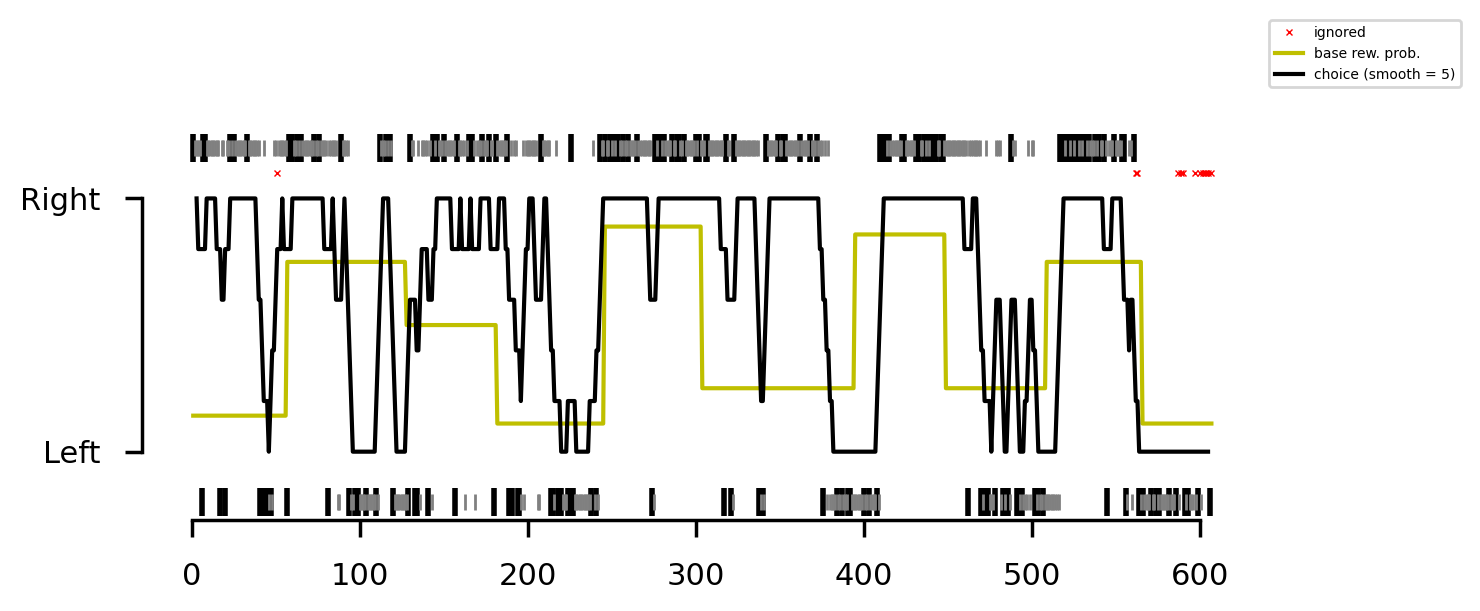

In [65]:
from pipeline.plot import foraging_model_plot

# Reformat data
_choice_history = df_trials.choice.values
choice_history = np.array([{'left': 0, 'right': 1, 'null': np.nan}[c] for c in _choice_history])

_reward = df_trials.outcome
reward_history = np.zeros([2, len(_reward)])  # .shape = (2, N trials)
for c in (0, 1):
    reward_history[c, choice_history==c] = (_reward[choice_history==c] == 'hit').astype(int)
    
p_reward = np.vstack([df_trials.left_reward_prob, df_trials.right_reward_prob])

# Plot session
foraging_model_plot.plot_session_lightweight([np.array([choice_history]), reward_history, p_reward])

## Plot events and spikes

Plot an excerpt of ephys recording (between `t_start` and `t_end`)

[(300.0, 400.0), Text(0.5, 0, 'time (sec)'), Text(0, 0.5, 'unit #')]

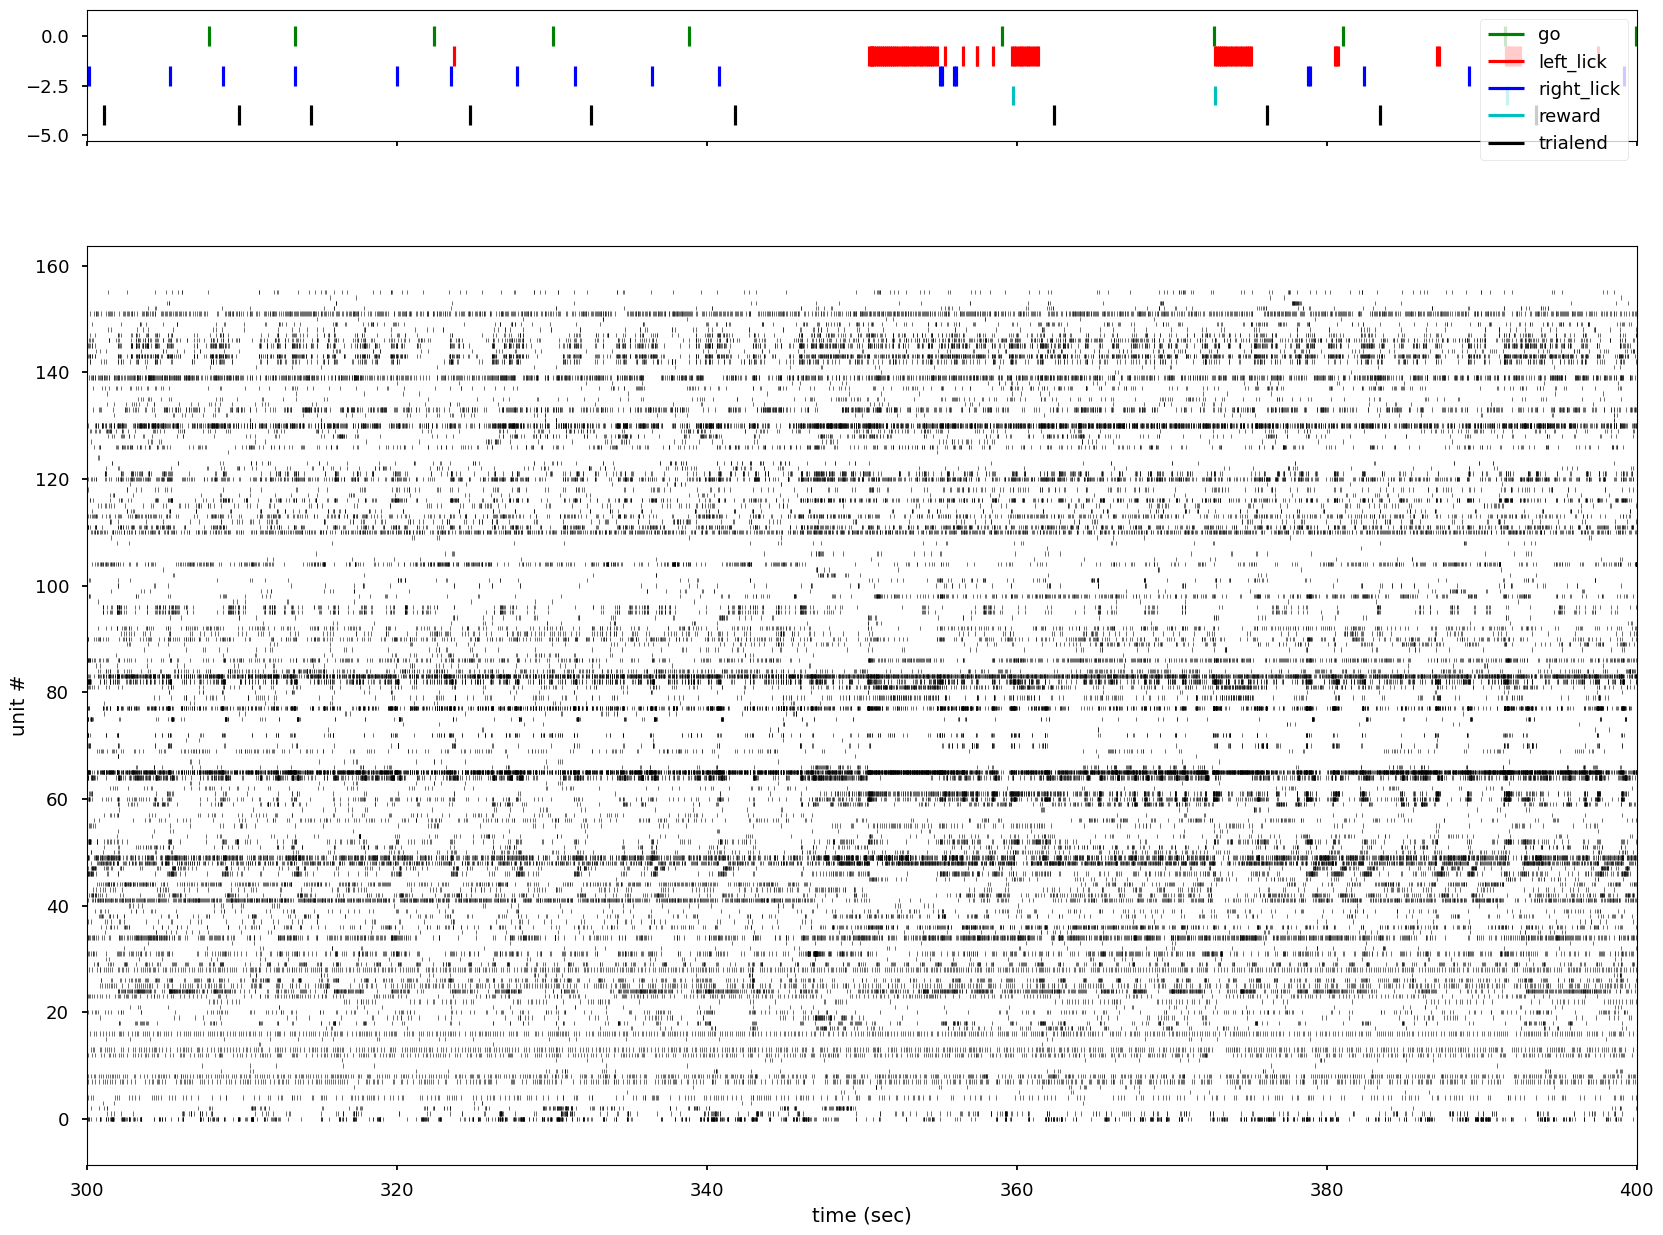

In [155]:
t_start, t_end = 300, 400

spike_times = df_units.spike_times
spike_times = [x[(x > t_start)&(x < t_end)] for x in spike_times]

event_color_map = {'go': 'g', 'left_lick': 'r', 'right_lick': 'b', 'reward': 'c', 'trialend': 'k'}
event_times = [dict_events[x][(dict_events[x] > t_start) & (dict_events[x] < t_end)] for x in event_color_map]

fig = plt.figure(figsize=(20, 15))
axs = fig.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 7]})

axs[1].eventplot(spike_times, colors='black', lineoffsets=1, linelengths=0.8, lw=0.4)
axs[0].eventplot(event_times, colors=list(event_color_map.values()), lineoffsets=-1)

axs[0].legend(event_color_map)
axs[1].set(xlim=(t_start, t_end), xlabel='time (sec)', ylabel='unit #')

# Get CCF location of each unit

`x`, `y`, `z` are in [CCF coordinates](http://help.brain-map.org/display/mousebrain/api)

In [59]:
df_units[['x', 'y', 'z', 'hemisphere', 'ccf_annotation']]

,x,y,z,hemisphere,ccf_annotation
0,4680.0,5280.0,6918.0,right,"anterior commissure, olfactory limb"
1,4640.0,5160.0,6938.0,right,Nucleus accumbens
2,4540.0,5000.0,6958.0,right,Caudoputamen
3,4540.0,5000.0,6958.0,right,Caudoputamen
4,4520.0,4980.0,6958.0,right,Caudoputamen
...,...,...,...,...,...
151,3820.0,2840.0,6298.0,right,"Prelimbic area, layer 5"
152,3680.0,2680.0,6298.0,right,"Prelimbic area, layer 5"
153,3400.0,2320.0,6318.0,right,"Anterior cingulate area, dorsal part, layer 5"
154,5120.0,4000.0,6398.0,right,"Lateral septal nucleus, rostral (rostroventral..."


Number of units per area

In [61]:
df_units.groupby(['hemisphere', 'ccf_annotation'])['hemisphere'].count()

hemisphere  ccf_annotation                                      
left        Anterior cingulate area, dorsal part, layer 5            1
            Lateral septal nucleus, rostral (rostroventral) part    16
            Prelimbic area, layer 6a                                 5
            Secondary motor area, layer 2/3                          3
            Secondary motor area, layer 5                            3
            Striatum                                                 3
right       Anterior cingulate area, dorsal part, layer 5            1
            Anterior cingulate area, ventral part, layer 5           1
            Caudoputamen                                            40
            Lateral septal nucleus, rostral (rostroventral) part    10
            Nucleus accumbens                                        1
            Prelimbic area, layer 5                                  2
            Secondary motor area, layer 2/3                          6
            

Units of this session came from three probes

In [63]:
df_units['group_name'].unique()

array(['18005108622 1-384', '18005123491 1-384', '19122505354 1-384'],
      dtype=object)

Plot units in CCF coordinate

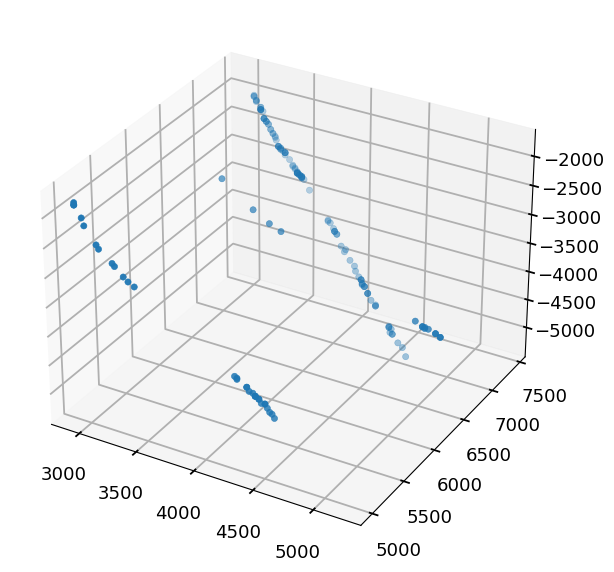

In [64]:
from mpl_toolkits import mplot3d

fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')

ax.scatter3D(df_units.x, df_units.z, -df_units.y)